# EDA

### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in web scraped file
df = pd.read_parquet('./Data/draft0522.parquet')

In [3]:
df.Round

0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
6062    2.0
6063    0.0
6064    1.0
6065    1.0
6066    1.0
Name: Round, Length: 6067, dtype: float64

In [4]:
df.columns

Index(['player', 'year', 'pos', 'school_name', 'height', 'weight', 'forty_yd',
       'vertical', 'bench_reps', 'broad_jump', 'cone', 'shuttle', 'g_season',
       'def_int_season', 'def_int_yds_season', 'def_int_yds_per_int_season',
       'def_int_career', 'def_int_yds_career', 'def_int_yds_per_int_career',
       'pass_cmp_season', 'pass_att_season', 'pass_cmp_pct_season',
       'pass_yds_season', 'pass_yds_per_att_season',
       'adj_pass_yds_per_att_season', 'pass_td_season', 'pass_int_season',
       'pass_rating_season', 'pass_cmp_career', 'pass_att_career',
       'pass_cmp_pct_career', 'pass_yds_career', 'pass_yds_per_att_career',
       'adj_pass_yds_per_att_career', 'pass_td_career', 'pass_int_career',
       'pass_rating_career', 'rush_att_season', 'rush_yds_season',
       'rush_yds_per_att_season', 'rush_td_season', 'rec_season',
       'rec_yds_season', 'rec_yds_per_rec_season', 'scrim_att_season',
       'scrim_yds_season', 'scrim_yds_per_att_season', 'scrim_td_season

### Assign rounds 1-3 as class 2, rounds 4-7 as class 1 ad undrafted players as class 0

### Balance of Classes

In [5]:
df.Round.value_counts(normalize=True)

0.0    0.358002
1.0    0.349761
2.0    0.292237
Name: Round, dtype: float64

### Create DataFrame for just combine information

In [45]:
combine = df[['player','college_conference','pos','Round','height','weight','speed','shuttle_agility','cone_agility','vertical','bench_reps','broad_jump','forty_yd','cone','shuttle']]

### Brief look at athletic profiling by round class by conferences

In [46]:
combine.groupby(['Round','college_conference']).mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\2287022228.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby(['Round','college_conference']).mean()


height      weight  \
Round college_conference                                                     
1.0   American Athletic Conference                   72.771930  220.965517   
      Atlantic Coast Conference                      73.786070  241.363184   
      Big East                                       72.722222  239.055556   
      Big Sky Conference                             74.636364  239.909091   
      Big South Conference                           72.600000  215.600000   
...                                                        ...         ...   
2.0   Southland Conference                           70.000000  183.500000   
      Southwestern Athletic Conference               77.000000  314.000000   
      Sun Belt Conference                            73.000000  227.545455   
      Western Athletic Conference                    74.600000  255.000000   
      Wisconsin Intercollegiate Athletic Conference  74.000000  320.000000   

                                                          speed  \
Round college_conference                                          
1.0   American Athletic Conference                    97.717581   
      Atlantic Coast Conference                       94.439012   
      Big East                                        95.489396   
      Big Sky Conference                              97.874520   
      Big South Conference                            97.924385   
...                                                         ...   
2.0   Southland Conference                           100.608873   
      Southwestern Athletic Conference               111.687858   
      Sun Belt Conference                            103.055954   
      Western Athletic Conference                    100.320004   
      Wisconsin Intercollegiate Athletic Conference  103.223312   

                                                     shuttle_agility  \
Round college_conference                                               
1.0   American Athletic Conference                        128.085066   
      Atlantic Coast Conference                           129.930262   
      Big East                                            132.725415   
      Big Sky Conference                                  140.182783   
      Big South Conference                                126.906301   
...                                                              ...   
2.0   Southland Conference                                122.067165   
      Southwestern Athletic Conference                    118.898214   
      Sun Belt Conference                                 132.879923   
      Western Athletic Conference                         137.835301   
      Wisconsin Intercollegiate Athletic Conference       145.451452   

                                                     cone_agility   vertical  \
Round college_conference                                                       
1.0   American Athletic Conference                     123.785319  34.081633   
      Atlantic Coast Conference                        126.027642  33.137500   
      Big East                                         124.774267  32.384615   
      Big Sky Conference                               129.603558  33.400000   
      Big South Conference                             122.680237  34.200000   
...                                                           ...        ...   
2.0   Southland Conference                             115.166011  38.250000   
      Southwestern Athletic Conference                 124.668517  32.000000   
      Sun Belt Conference                              124.110899  35.722222   
      Western Athletic Conference                      137.508878  32.600000   
      Wisconsin Intercollegiate Athletic Conference    149.302107  32.000000   

                                                     bench_reps  broad_jump  \
Round college_conference                                                      
1.0   American Athletic Conferenc

In [88]:
pd.set_option("display.max_columns", None)
df.groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3966200504.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Round').mean()


,year,height,weight,forty_yd,vertical,bench_reps,broad_jump,cone,shuttle,g_season,def_int_season,def_int_yds_season,def_int_yds_per_int_season,def_int_career,def_int_yds_career,def_int_yds_per_int_career,pass_cmp_season,pass_att_season,pass_cmp_pct_season,pass_yds_season,pass_yds_per_att_season,adj_pass_yds_per_att_season,pass_td_season,pass_int_season,pass_rating_season,pass_cmp_career,pass_att_career,pass_cmp_pct_career,pass_yds_career,pass_yds_per_att_career,adj_pass_yds_per_att_career,pass_td_career,pass_int_career,pass_rating_career,rush_att_season,rush_yds_season,rush_yds_per_att_season,rush_td_season,rec_season,rec_yds_season,rec_yds_per_rec_season,scrim_att_season,scrim_yds_season,scrim_yds_per_att_season,scrim_td_season,rush_att_career,rush_yds_career,rush_yds_per_att_career,rush_td_career,rec_career,rec_yds_career,rec_yds_per_rec_career,rec_td_career,scrim_att_career,scrim_yds_career,scrim_yds_per_att_career,scrim_td_career,fumbles_rec_yds_career,fumbles_rec_td_career,rec_td_season,def_int_td_season,def_int_td_career,fumbles_rec_career,fumbles_rec_yds_season,fumbles_rec_td_season,fumbles_rec_season,tackles_solo_season,tackles_assists_season,tackles_total_season,tackles_loss_season,sacks_season,pass_defended_season,tackles_solo_career,tackles_assists_career,tackles_total_career,tackles_loss_career,sacks_career,pass_defended_career,fumbles_forced_season,fumbles_forced_career,pick,Age,speed,shuttle_agility,cone_agility
Round,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2014.007366,73.503244,237.049954,4.815307,32.091985,19.259958,113.540159,7.299085,4.440916,10.944675,1.997312,35.775087,18.585417,4.252988,65.394619,15.922072,227.539130,366.739130,61.878261,2826.582609,7.884348,7.885217,21.964602,9.362832,141.891304,575.803419,941.444444,60.696581,7117.213675,7.600000,7.515385,53.051282,24.931034,137.694017,85.190981,436.197333,5.213978,6.974249,34.721088,441.011905,11.597789,88.290756,710.737815,10.405546,6.422735,198.551339,1040.611607,5.315541,15.592982,90.045000,1149.238333,11.872333,9.422101,237.496678,1919.735880,10.567110,16.174497,28.050633,1.030303,4.385463,1.037975,1.245902,1.759420,26.640000,1.000000,1.254545,30.609655,21.981844,52.103022,5.790663,3.201149,3.636364,82.212038,57.807114,139.811475,14.280284,6.479279,7.647766,1.541850,2.410714,NaN,NaN,88.401341,123.765949,122.881392
1.0,2013.469840,73.771672,243.699811,4.761854,32.847725,20.975228,114.865316,7.252012,4.399943,11.738958,2.243011,39.024324,17.815804,4.437500,70.166966,15.207914,246.067416,389.977528,62.785393,3095.101124,7.970787,8.184270,23.988764,8.764045,145.588764,641.505495,1038.461538,61.248352,8028.109890,7.742857,7.797802,60.780220,25.890110,140.626374,97.813648,536.018470,5.763564,8.243802,40.508929,527.391071,12.190000,106.109735,882.283186,10.777168,7.901460,214.908257,1165.356164,5.897241,16.631757,97.977072,1279.190476,12.281481,10.562264,262.769366,2175.556338,10.825704,18.605310,31.712963,1.093750,5.032328,1.174757,1.455752,1.906566,31.725000,1.040000,1.352113,34.306698,23.456471,57.398364,7.073892,3.762810,3.878277,91.192084,60.313225,151.187935,16.374853,7.489525,8.020408,1.728863,2.578571,170.313855,22.601182,94.601681,131.525983,128.218943
2.0,2013.557248,74.157716,246.776145,4.713309,33.672163,21.771523,117.143781,7.216081,4.376118,12.063798,2.379464,41.983333,18.004167,4.629442,71.803435,15.334924,254.051546,389.525773,64.962887,3290.103093,8.332990,8.741237,27.229167,8.347368,153.223711,632.103093,1002.907216,63.142268,8105.298969,8.206186,8.473196,63.237113,23.247423,149.088660,102.177632,610.840000,6.383946,10.548913,49.032710,685.387850,13.336916,121.324009,1113.546729,11.968224,10.714628,211.849711,1261.608824,6.299412,19.069869,113.939954,1581.651270,13.158430,13.749403,282.571429,2572.290993,11.801617,23.425926,32.487603,1.124138,6.667546,1.171875,1.416327,1.886010,31.566667,1.046154,1.373391,36.646402,23.910670,60.557072,9.074454,5.182119,4.447316,88.885890,58.630675,147.51656

In [90]:
df[df.pos == 'WR'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3696365831.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.pos == 'WR'].groupby('Round').mean()


,year,height,weight,forty_yd,vertical,bench_reps,broad_jump,cone,shuttle,g_season,def_int_season,def_int_yds_season,def_int_yds_per_int_season,def_int_career,def_int_yds_career,def_int_yds_per_int_career,pass_cmp_season,pass_att_season,pass_cmp_pct_season,pass_yds_season,pass_yds_per_att_season,adj_pass_yds_per_att_season,pass_td_season,pass_int_season,pass_rating_season,pass_cmp_career,pass_att_career,pass_cmp_pct_career,pass_yds_career,pass_yds_per_att_career,adj_pass_yds_per_att_career,pass_td_career,pass_int_career,pass_rating_career,rush_att_season,rush_yds_season,rush_yds_per_att_season,rush_td_season,rec_season,rec_yds_season,rec_yds_per_rec_season,scrim_att_season,scrim_yds_season,scrim_yds_per_att_season,scrim_td_season,rush_att_career,rush_yds_career,rush_yds_per_att_career,rush_td_career,rec_career,rec_yds_career,rec_yds_per_rec_career,rec_td_career,scrim_att_career,scrim_yds_career,scrim_yds_per_att_career,scrim_td_career,fumbles_rec_yds_career,fumbles_rec_td_career,rec_td_season,def_int_td_season,def_int_td_career,fumbles_rec_career,fumbles_rec_yds_season,fumbles_rec_td_season,fumbles_rec_season,tackles_solo_season,tackles_assists_season,tackles_total_season,tackles_loss_season,sacks_season,pass_defended_season,tackles_solo_career,tackles_assists_career,tackles_total_career,tackles_loss_career,sacks_career,pass_defended_career,fumbles_forced_season,fumbles_forced_career,pick,Age,speed,shuttle_agility,cone_agility
Round,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2014.224189,72.988095,202.645833,4.556719,34.493127,13.861751,119.830986,7.019786,4.288245,11.068966,1.0,NaN,NaN,2.0,NaN,NaN,150.8,254.4,66.34,1878.60,12.52,12.20,19.00,11.25,182.240,371.4,651.8,54.72,4590.00,7.300,6.38,31.6,22.80,124.2,6.959732,41.979730,5.802055,1.482759,50.804270,708.099644,14.145196,54.494662,730.209964,13.774377,5.799270,19.206731,118.653846,5.697073,3.164179,131.514085,1845.531690,14.364789,14.056738,145.563380,1932.235915,13.917958,14.808511,NaN,NaN,5.663004,NaN,NaN,2.0,NaN,NaN,NaN,41.0,28.666667,56.0,8.0,NaN,1.0,81.666667,82.666667,164.333333,29.0,5.0,4.0,1.0,3.0,NaN,NaN,94.313691,121.595025,118.194985
1.0,2013.350746,72.483146,200.936330,4.489344,35.246862,14.429412,121.008696,6.939185,4.229140,12.008230,NaN,NaN,NaN,NaN,NaN,NaN,147.5,262.0,56.10,1849.75,7.40,6.95,13.75,8.50,130.375,471.0,857.5,54.15,5880.75,7.075,6.45,42.5,28.75,123.4,8.610390,56.947368,6.430000,1.953488,59.478992,856.285714,14.682773,64.778243,888.920502,14.204603,7.310638,19.974227,130.933333,6.460309,2.730769,144.790795,2088.066946,14.797490,16.197479,161.004184,2194.849372,14.217155,17.008368,NaN,NaN,7.012876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.343284,22.440945,99.154397,125.933283,119.936630
2.0,2013.516807,72.725738,202.843882,4.447568,36.266129,15.944444,123.280220,6.921061,4.217071,12.078341,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,100.00,3.00,3.00,3.00,NaN,NaN,125.200,396.0,667.0,59.40,5295.00,7.900,8.40,52.0,17.00,146.7,12.251572,91.909677,7.134194,2.250000,67.506977,1006.376744,15.319070,76.567442,1072.637209,14.705116,9.654206,25.885870,184.718232,6.951381,3.440860,159.299539,2370.341014,15.192166,20.304147,181.248848,2524.414747,14.536406,21.760369,NaN,NaN,9.107981,NaN,NaN,NaN,NaN,NaN,NaN,57.0,52.000000,109.0,8.0,5.0,NaN,95.000000,105.000000,200.000000,18.5,7.0,1.0,NaN,NaN,51.932773,21.965217,103.831506,129.223810,122.304337


### Athletic testing by round class

In [79]:
graph_combine = combine.groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3481140322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph_combine = combine.groupby('Round').mean()


In [81]:
graph_combine

,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,73.503244,237.049954,88.401341,123.765949,122.881392,32.091985,19.259958,113.540159,4.815307,7.299085,4.440916
1.0,73.771672,243.699811,94.601681,131.525983,128.218943,32.847725,20.975228,114.865316,4.761854,7.252012,4.399943
2.0,74.157716,246.776145,99.821009,136.640225,132.612171,33.672163,21.771523,117.143781,4.713309,7.216081,4.376118


There is a clear order in most features of the most athletic players being in class 2 and the least athletic players in class 0. This lines up with what we would expect. There seems to be a slightly bigger gap betweeen class 0 and 1 than class 1 and 2.

C:\Users\capta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


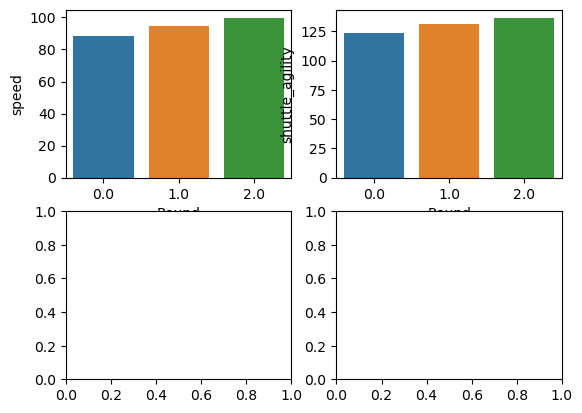

<Figure size 1200x480 with 0 Axes>

<Figure size 640x1200 with 0 Axes>

In [86]:
fig, axs = plt.subplots(2,2)
plt.figure().set_figwidth(12)
plt.figure().set_figheight(12)
sns.barplot(graph_combine.reset_index().Round,c.speed,ax=axs[0][0])
sns.barplot(graph_combine.reset_index().Round,c.shuttle_agility,ax=axs[0][1]);

In [92]:
qb_graph = combine[combine.pos == 'QB'].groupby('Round').mean()
qb_graph

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\4266793017.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qb_graph = combine[combine.pos == 'QB'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,74.335766,220.759124,81.766384,122.923839,121.280071,30.654762,17.416667,110.547619,4.832443,7.155126,4.366748
1.0,74.936842,222.210526,82.867480,127.204255,122.303127,30.822785,22.250000,110.307692,4.824719,7.147792,4.338182
2.0,75.326531,225.234694,88.005132,134.060199,129.967868,31.760563,22.000000,113.757143,4.774368,7.034688,4.292769


For QBs speed and cone agility times differentiate class 2 from the others while class 0 falls behind in strength

C:\Users\capta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


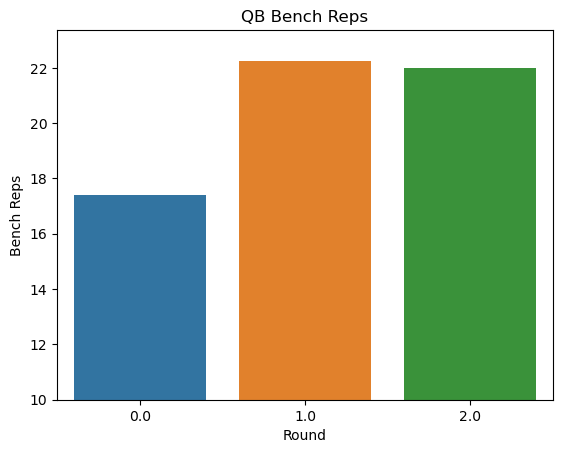

In [102]:
sns.barplot(qb_graph.reset_index().Round,qb_graph.bench_reps)
plt.title('QB Bench Reps')
plt.ylim(bottom=10)
plt.ylabel('Bench Reps');


C:\Users\capta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


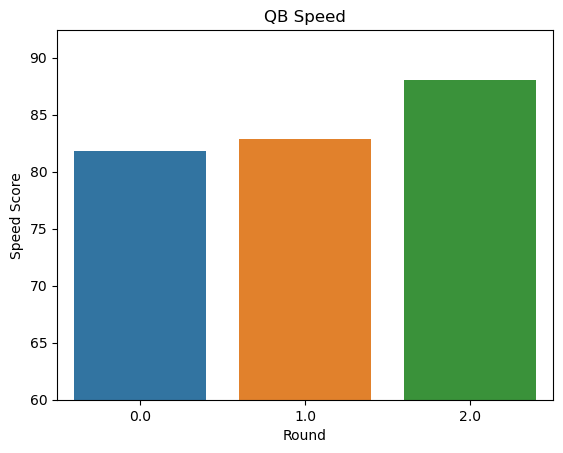

In [105]:
sns.barplot(qb_graph.reset_index().Round,qb_graph.speed)
plt.title('QB Speed')
plt.ylim(bottom=60)
plt.ylabel('Speed Score');

In [50]:
combine[combine.pos == 'RB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3685605720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'RB'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,70.074074,211.300926,94.727108,122.395618,118.053559,33.866667,18.934132,117.112360,4.598966,7.112119,4.328182
1.0,70.340314,212.713542,100.914417,130.214219,122.232216,34.063218,19.253333,118.420118,4.533135,7.056387,4.270783
2.0,70.718750,216.609375,106.416123,135.664357,128.205362,35.360360,20.580645,121.571429,4.494355,6.963043,4.233600


In [51]:
combine[combine.pos == 'WR'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\2877891251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'WR'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,72.988095,202.645833,94.313691,121.595025,118.194985,34.493127,13.861751,119.830986,4.556719,7.019786,4.288245
1.0,72.483146,200.936330,99.154397,125.933283,119.936630,35.246862,14.429412,121.008696,4.489344,6.939185,4.229140
2.0,72.725738,202.843882,103.831506,129.223810,122.304337,36.266129,15.944444,123.280220,4.447568,6.921061,4.217071


In [52]:
combine[combine.pos == 'TE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1251359511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'TE'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,76.063063,251.774775,93.551562,132.518077,134.351775,31.988095,19.500000,114.096386,4.824455,7.215775,4.426389
1.0,76.301587,252.055556,100.915024,138.564668,138.892433,33.055556,20.080808,115.680851,4.733739,7.141047,4.378539
2.0,76.604396,252.725275,105.909475,142.923596,140.812565,34.410448,21.743243,118.830769,4.681667,7.120678,4.349000


In [106]:
ol_graph = combine[combine.pos == 'OL'].groupby('Round').mean()
ol_graph

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1135046952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ol_graph = combine[combine.pos == 'OL'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,76.473016,310.408228,79.140947,115.843286,126.051169,26.710744,24.131687,100.377119,5.309034,7.920463,4.832027
1.0,76.659155,313.326761,83.028905,124.878228,133.064907,27.774138,25.584229,102.604895,5.248806,7.781571,4.742148
2.0,76.848185,313.676568,89.023617,131.509597,136.705506,28.775000,26.176955,105.258475,5.164520,7.723864,4.686930


C:\Users\capta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


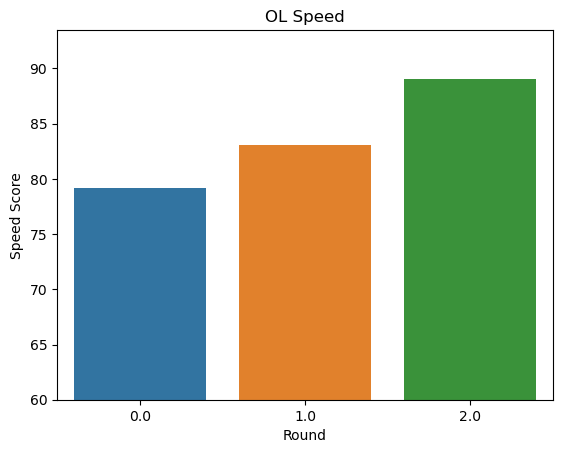

In [109]:
sns.barplot(ol_graph.reset_index().Round,ol_graph.speed)
plt.title('OL Speed')
plt.ylabel('Speed Score')
plt.ylim(bottom=60);

C:\Users\capta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


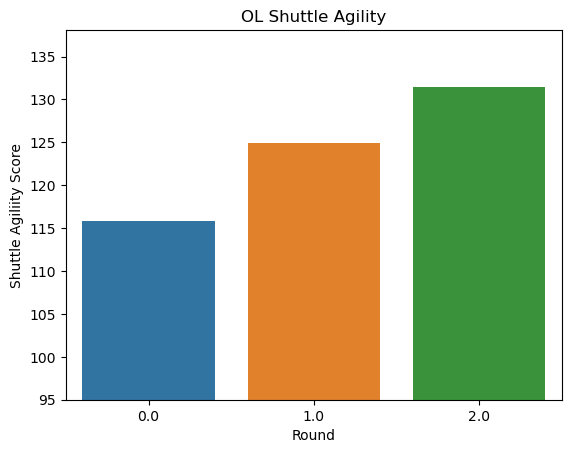

In [111]:
sns.barplot(ol_graph.reset_index().Round,ol_graph.shuttle_agility)
plt.title('OL Shuttle Agility')
plt.ylabel('Shuttle Agiliity Score')
plt.ylim(bottom=95);

In [54]:
combine[combine.pos == 'DT'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1432382243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DT'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,74.788462,303.600000,85.775673,127.555307,132.495672,28.970238,26.060241,104.487805,5.168163,7.716301,4.684267
1.0,74.879699,309.263158,91.548388,135.054023,135.372723,28.969072,27.622449,104.673913,5.107521,7.724118,4.641647
2.0,74.955882,308.595588,95.581917,134.546036,138.819182,29.407895,29.368932,105.935780,5.050821,7.649479,4.639697


In [55]:
combine[combine.pos == 'DE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1567406051.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DE'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,75.598131,268.056075,93.485731,132.212056,133.550314,31.310976,22.376471,111.439024,4.897451,7.384507,4.498194
1.0,75.628788,267.121212,98.900666,139.989576,136.730430,33.203883,23.926606,114.592233,4.827656,7.309341,4.424783
2.0,76.116438,269.369863,105.053192,145.433524,143.801102,33.422131,24.471154,117.453782,4.764500,7.224717,4.403585


In [56]:
combine[combine.pos == 'EDGE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3572871084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'EDGE'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,74.833333,250.277778,92.994933,140.766804,128.953567,32.363636,22.642857,114.250000,4.825714,7.316667,4.357500
1.0,75.652174,252.565217,106.496813,136.932582,141.426551,34.675000,23.133333,119.789474,4.672632,7.082727,4.380714
2.0,75.916667,253.166667,113.688929,147.334700,143.960990,35.026316,22.916667,122.789474,4.598235,7.062000,4.310000


In [57]:
combine[combine.pos == 'LB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\587442158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'LB'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,73.330396,238.118943,92.567227,133.369722,127.855608,32.823529,20.752941,115.542373,4.770048,7.200597,4.359420
1.0,73.531250,240.050781,99.776466,141.634222,133.712690,33.995327,22.849057,117.247706,4.690210,7.126848,4.304024
2.0,73.876190,242.066667,105.574229,146.731371,137.462025,35.404624,22.690789,120.304598,4.633520,7.075075,4.273066


In [58]:
combine[combine.pos == 'CB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\580484838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'CB'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,71.154286,190.708571,89.653965,123.907290,112.758989,35.190647,13.422222,120.681481,4.545854,6.967097,4.196701
1.0,71.175926,193.125000,95.758811,127.334519,116.283439,35.811377,15.142857,122.006173,4.483786,6.941440,4.187846
2.0,71.558559,194.747748,99.933313,135.329425,120.245162,36.516854,15.449704,124.066667,4.446959,6.880362,4.130417


In [59]:
combine[combine.pos == 'DB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1703419566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DB'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,71.000000,192.250000,88.548204,115.598568,110.380689,35.532258,13.592593,122.419355,4.569,7.049000,4.280968
1.0,72.166667,200.083333,91.268843,114.416572,111.676351,36.153846,16.181818,125.818182,4.572,7.115455,4.332727
2.0,72.600000,198.133333,103.156264,115.934135,116.216195,36.566667,14.600000,126.133333,4.430,6.989000,4.312000


In [60]:
combine[combine.pos == 'S'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\2438189165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'S'].groupby('Round').mean()


,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
Round,,,,,,,,,,,
0.0,71.973154,205.711409,91.139147,125.597581,117.300861,34.178571,16.491379,118.653226,4.615324,7.060645,4.263776
1.0,72.300000,207.747059,98.399385,133.797346,122.698252,35.691489,17.482759,121.414286,4.537962,6.990686,4.210392
2.0,72.377193,207.807018,102.417802,138.857501,126.211454,36.717391,16.814815,123.636364,4.495149,6.909273,4.168750


In [61]:
combine.groupby('college_conference').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3304860561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby('college_conference').mean()


,Round,height,weight,speed,shuttle_agility,cone_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle
college_conference,,,,,,,,,,,,
American Athletic Conference,1.447619,73.336538,229.590476,98.568315,131.582385,128.206450,34.126437,18.960526,120.069767,4.641319,7.130469,4.338594
Atlantic Coast Conference,1.468421,74.100529,244.851852,97.350592,131.976086,129.089104,33.282392,21.366038,116.822148,4.736599,7.255841,4.405190
Big East,1.590909,73.318182,240.318182,99.335767,136.320756,133.786422,33.400000,23.333333,116.714286,4.689091,7.154815,4.346452
Big Sky Conference,1.214286,74.642857,235.000000,99.500505,140.585017,127.880187,33.576923,18.300000,117.923077,4.653571,7.035000,4.259091
Big South Conference,1.000000,72.600000,215.600000,97.924385,126.906301,122.680237,34.200000,18.200000,121.800000,4.578000,7.058000,4.292000
Big Ten Conference,1.525126,74.268844,248.698492,98.102442,138.033027,133.712216,33.491429,21.424561,116.685246,4.738736,7.235690,4.375904
Big Twelve Conference,1.500000,73.853448,245.254310,98.286343,133.761370,130.755450,33.583784,21.703030,117.108696,4.729009,7.253942,4.403586
Central Intercollegiate Athletic Association,1.000000,75.000000,195.000000,92.612967,NaN,NaN,36.000000,NaN,124.000000,4.530000,NaN,NaN
Colonial Athletic Association,1.300000,73.850000,244.750000,95.135846,132.269231,124.599205,32.562500,19.466667,115.562500,4.770000,7.287333,4.392667


C:\Users\capta\AppData\Local\Temp\ipykernel_25540\598963420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(df.corr()['Round'].abs().sort_values(ascending=False).head(12).tail(10)),annot=True,cmap='cividis');


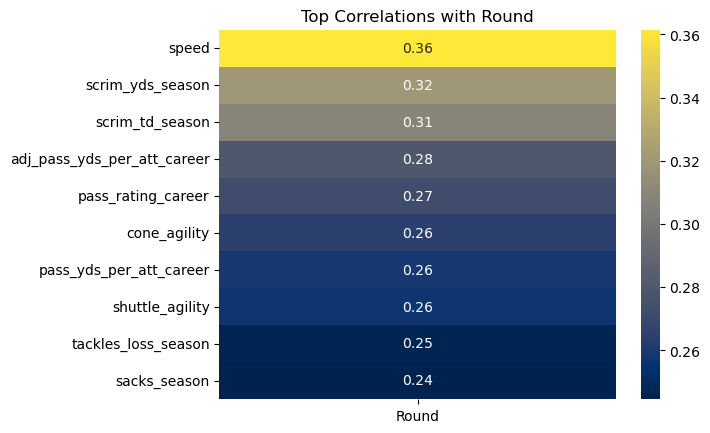

In [62]:
plt.title('Top Correlations with Round')
sns.heatmap(pd.DataFrame(df.corr()['Round'].abs().sort_values(ascending=False).head(12).tail(10)),annot=True,cmap='cividis');

In [63]:
pd.DataFrame(df.corr()['Round'].abs().sort_values())

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3637539340.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.corr()['Round'].abs().sort_values())


,Round
tackles_assists_career,0.007920
def_int_yds_per_int_season,0.014113
def_int_yds_per_int_career,0.018117
rush_att_career,0.022054
fumbles_rec_career,0.033243
...,...
scrim_td_season,0.308512
scrim_yds_season,0.319685
speed,0.361478
pick,0.844110


C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1085805742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine.corr().abs(),annot=True);


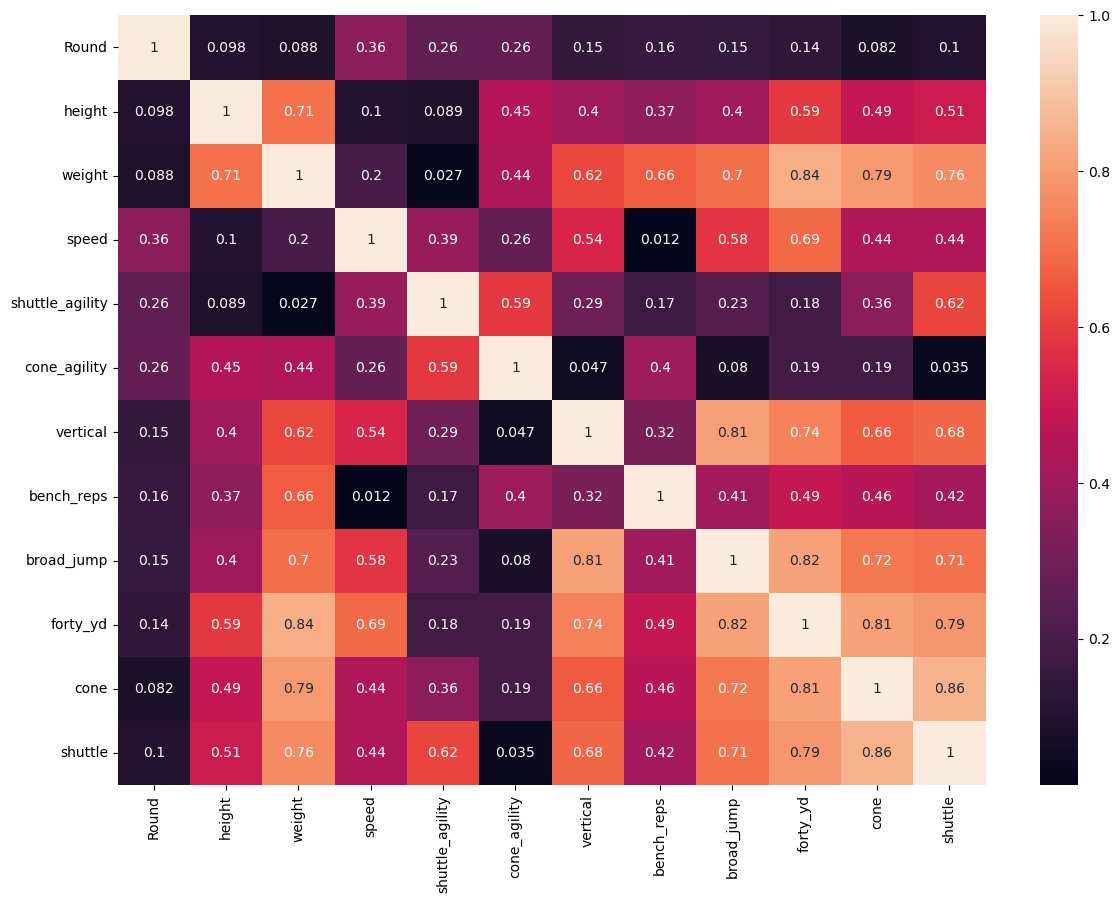

In [64]:
plt.figure(figsize=(14,10))
sns.heatmap(combine.corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\335694056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'QB'].corr().abs(),annot=True);


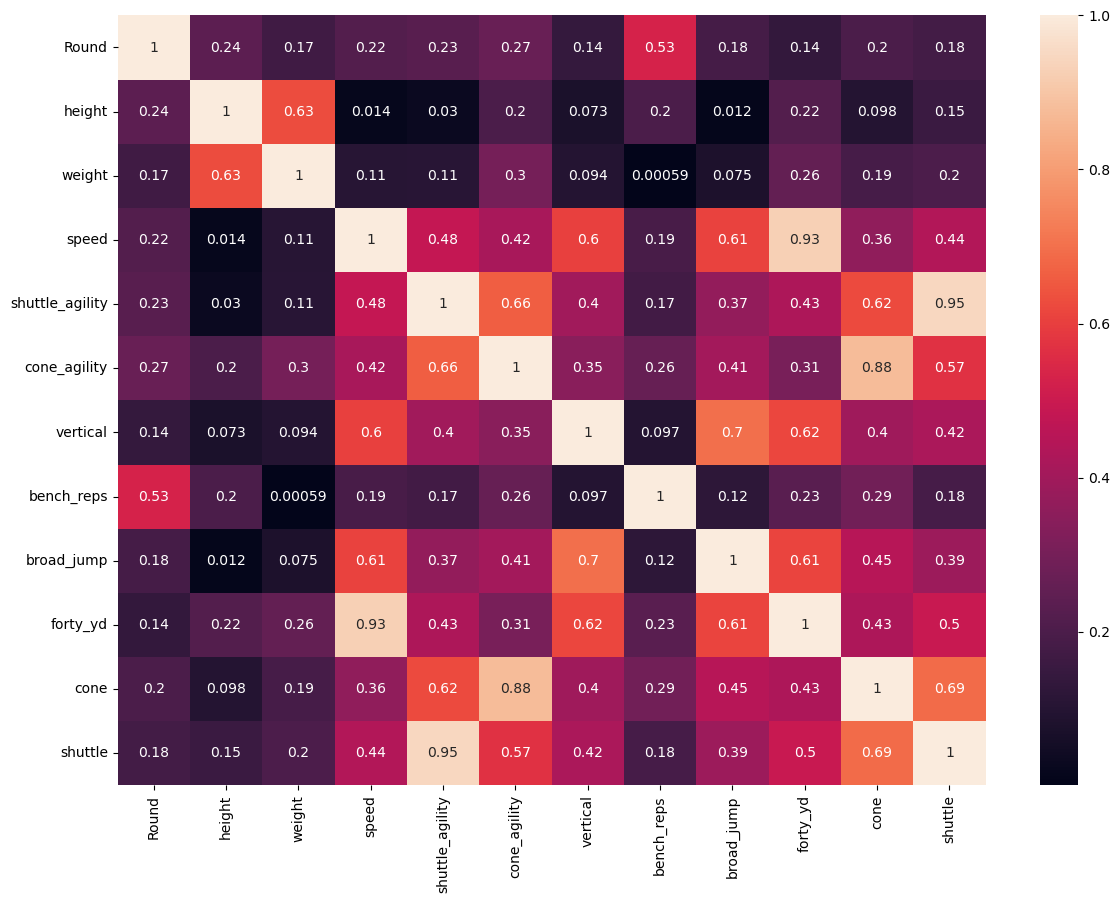

In [65]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'QB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\2060570500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'RB'].corr().abs(),annot=True);


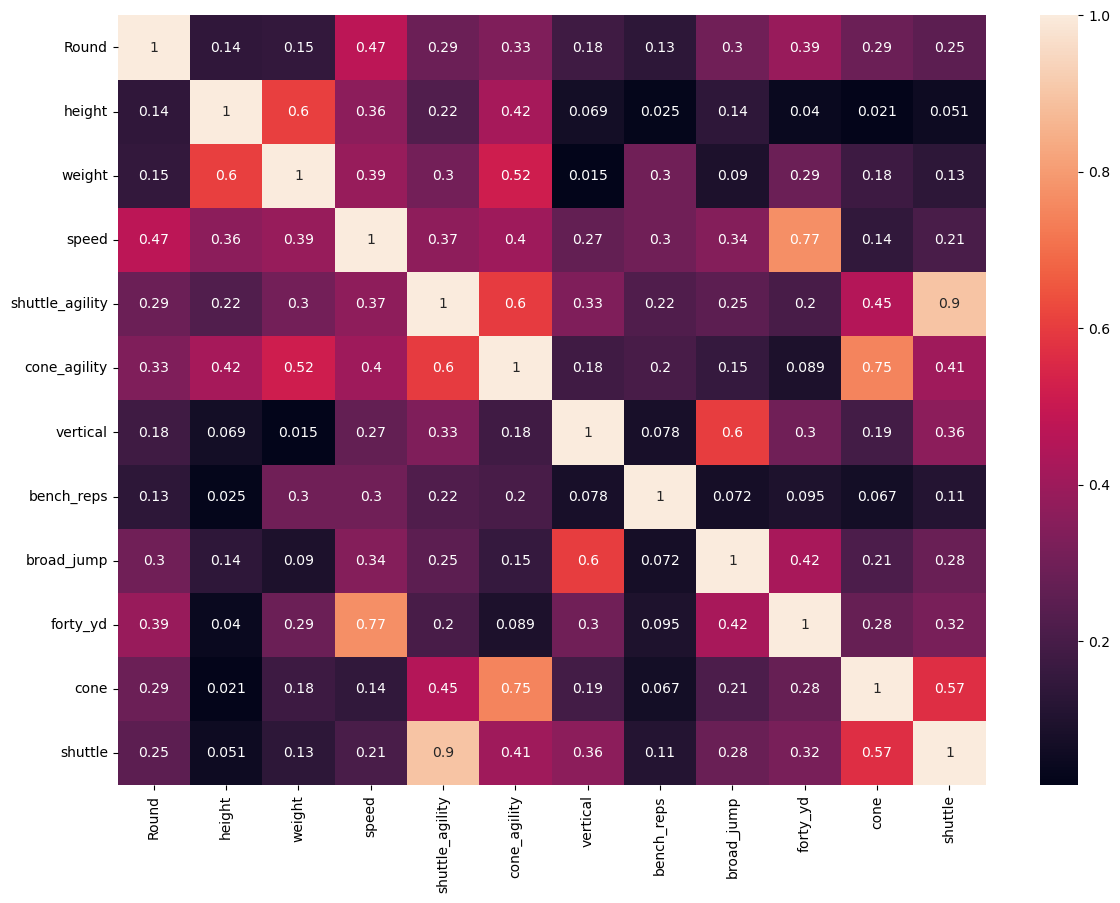

In [66]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'RB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\2538329814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'WR'].corr().abs(),annot=True);


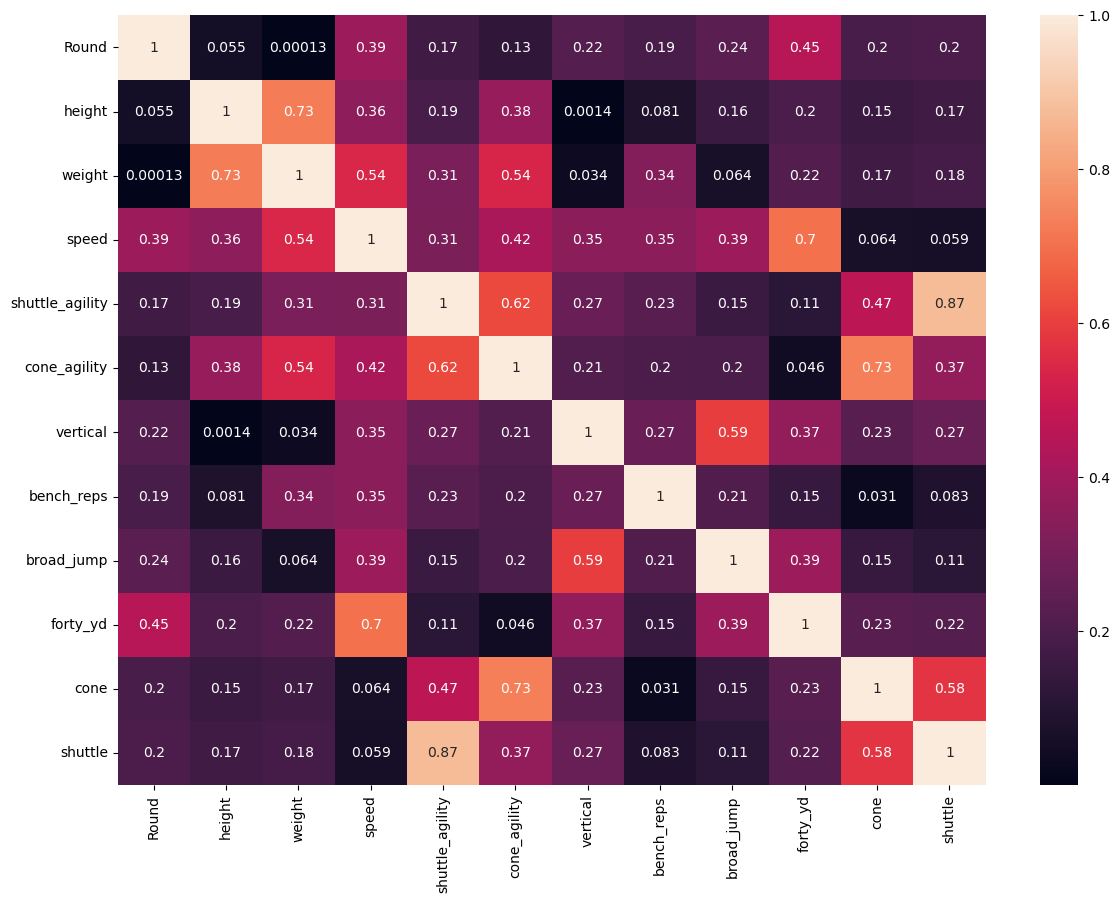

In [67]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'WR'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\4265659709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'TE'].corr().abs(),annot=True);


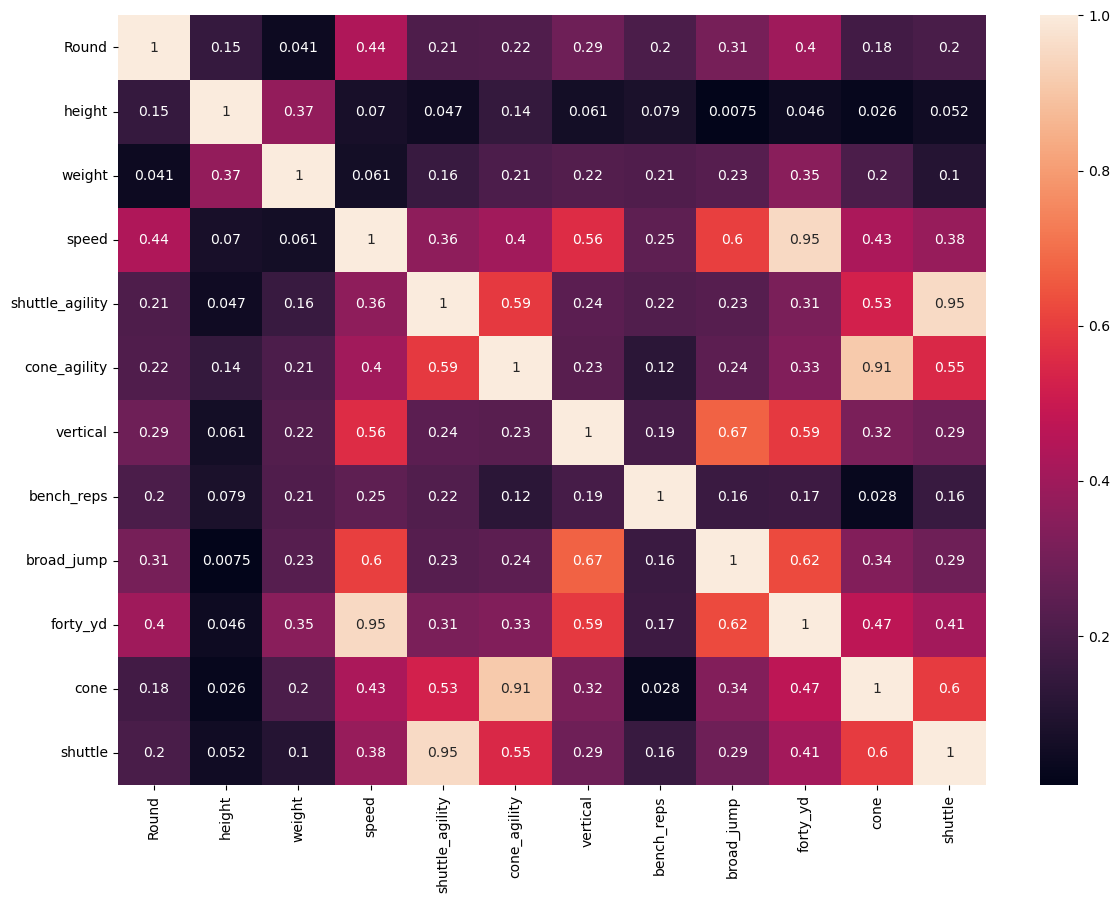

In [68]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'TE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\2779586782.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'OL'].corr().abs(),annot=True);


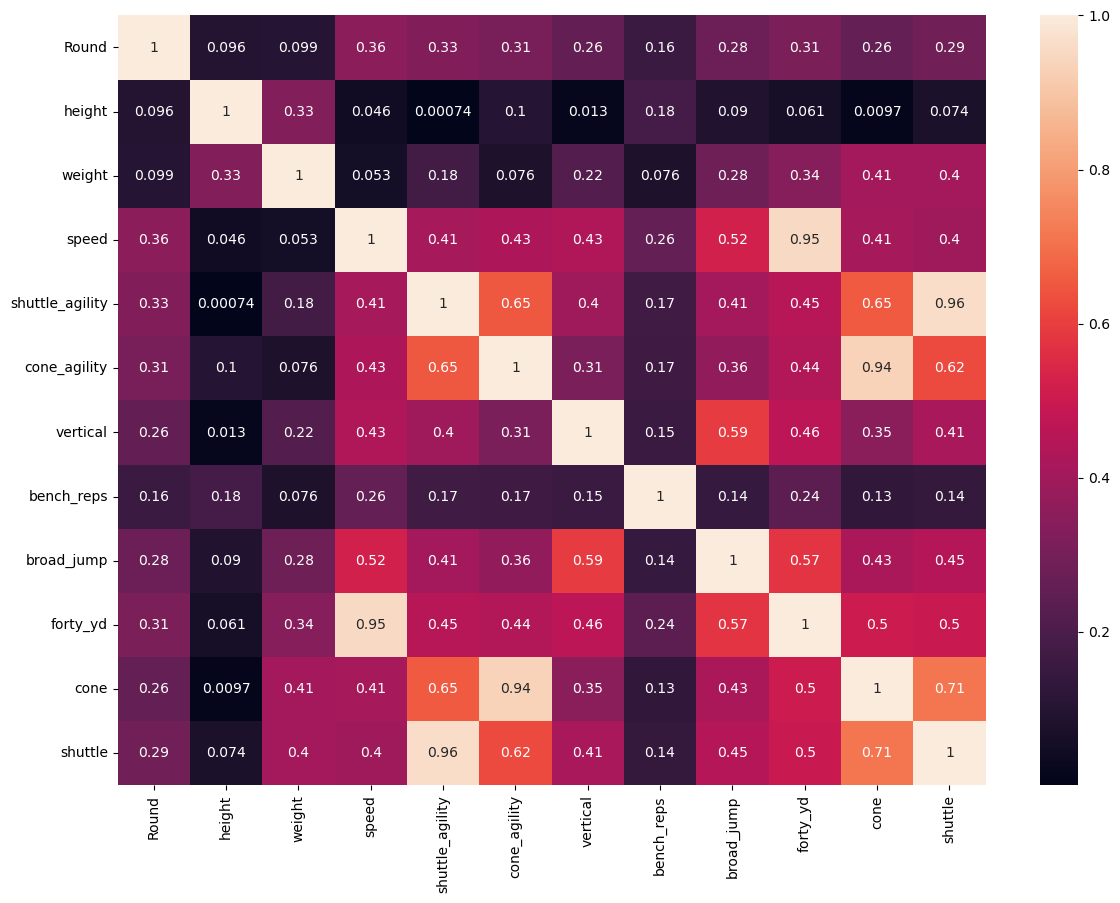

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'OL'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1482279189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DL'].corr().abs(),annot=True);


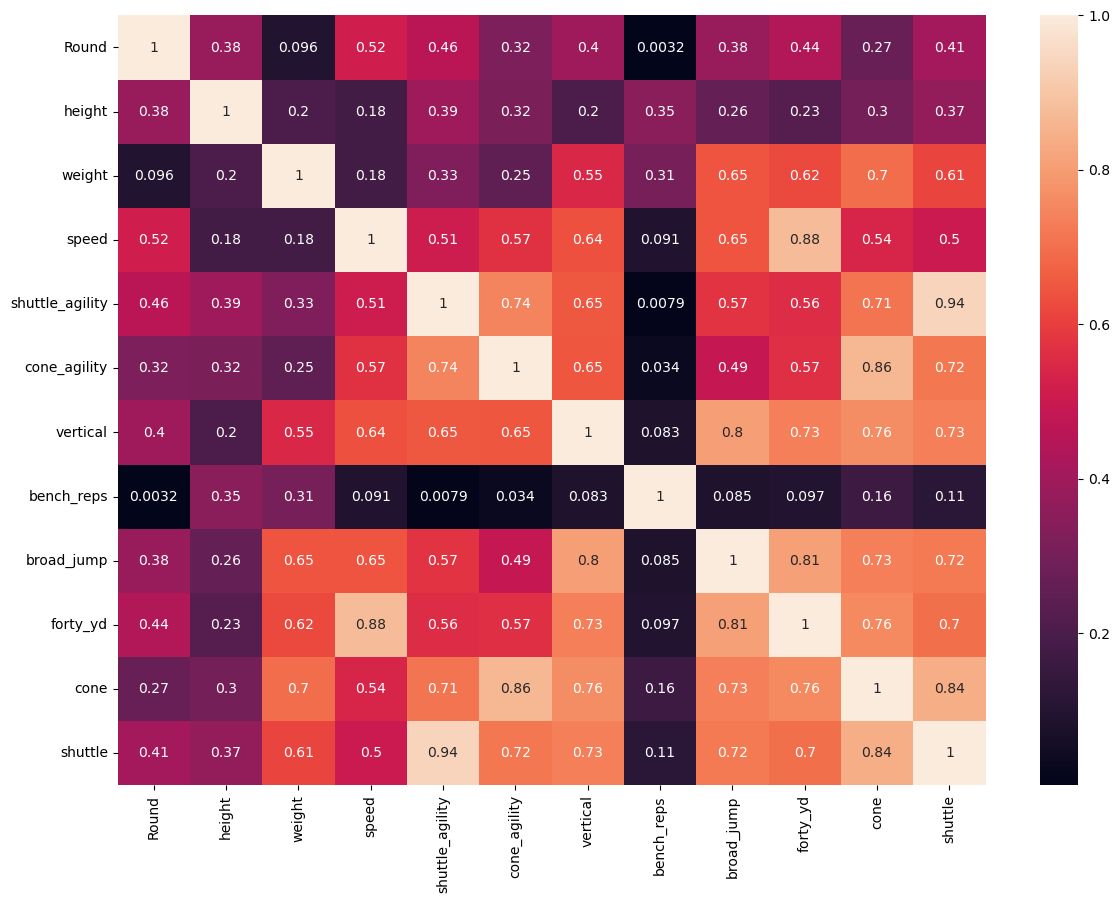

In [70]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DL'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\736944607.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DE'].corr().abs(),annot=True);


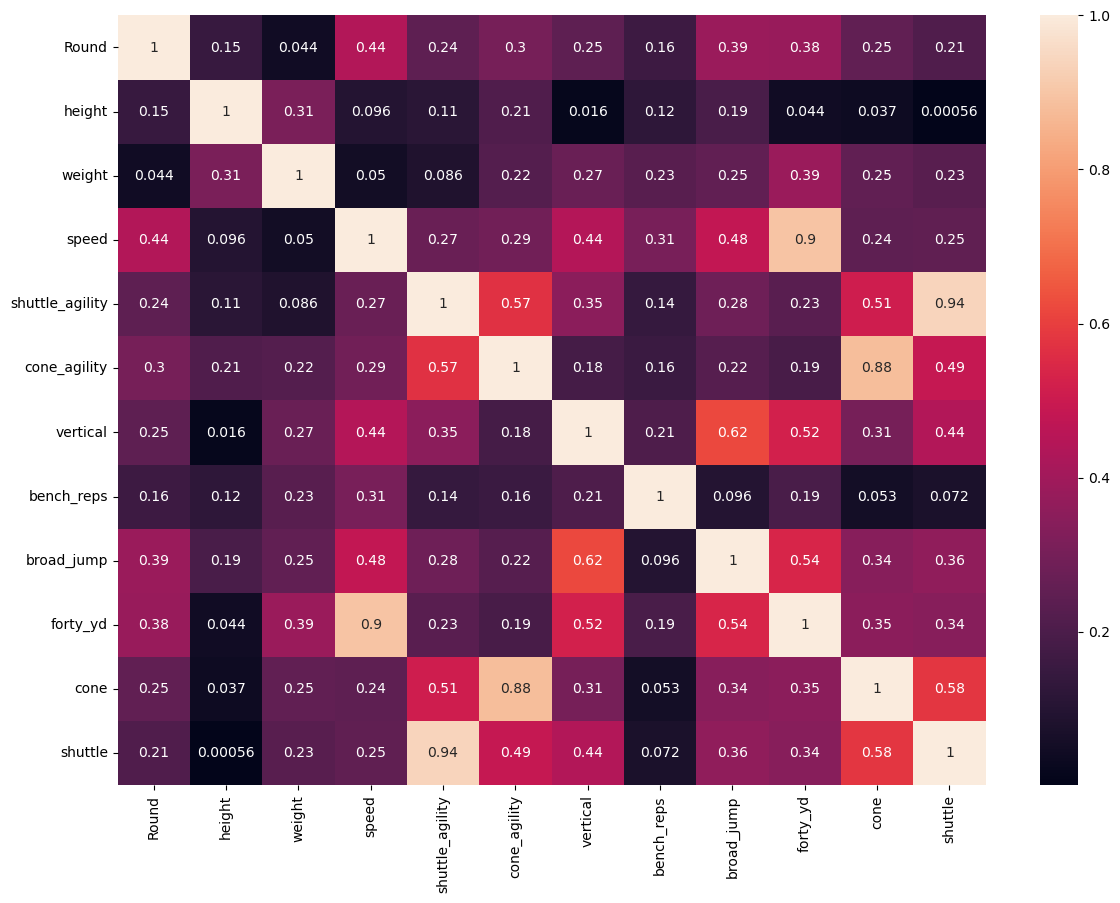

In [71]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\1040784863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'EDGE'].corr().abs(),annot=True);


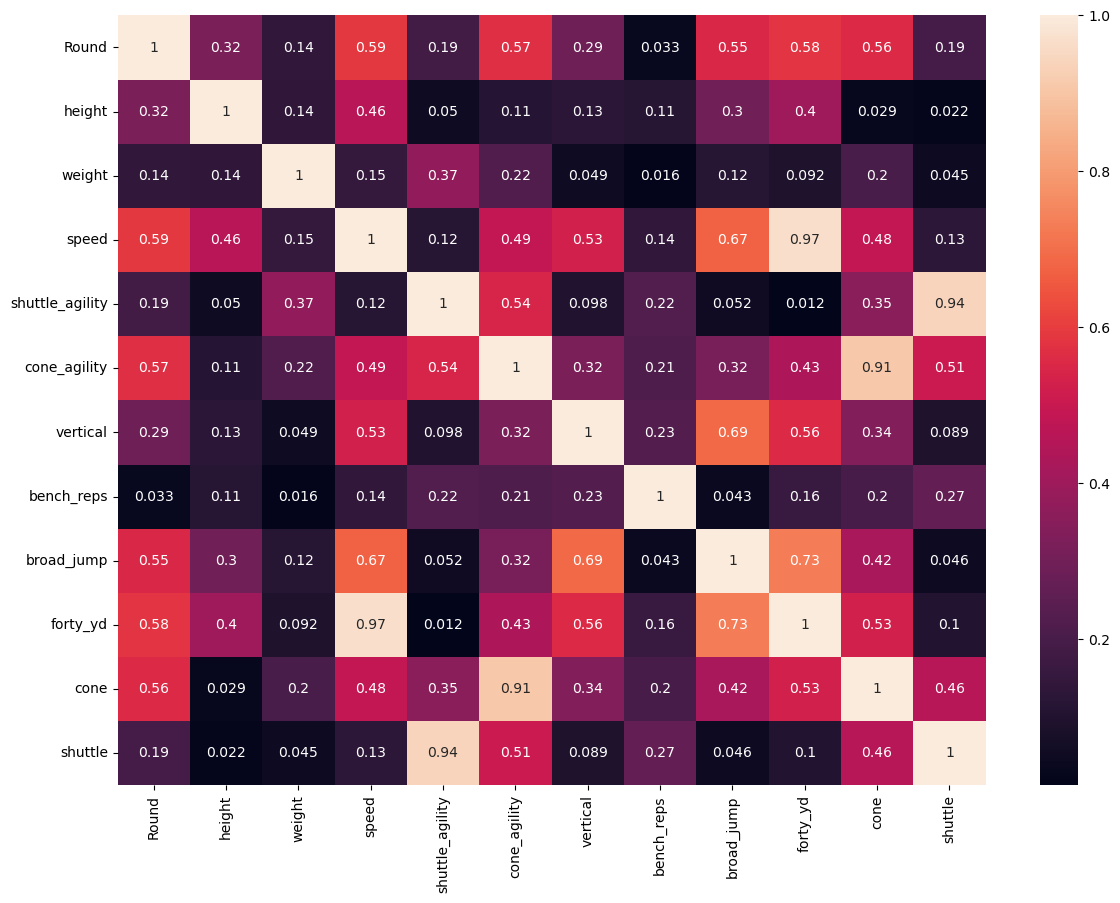

In [72]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'EDGE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\692367660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'LB'].corr().abs(),annot=True);


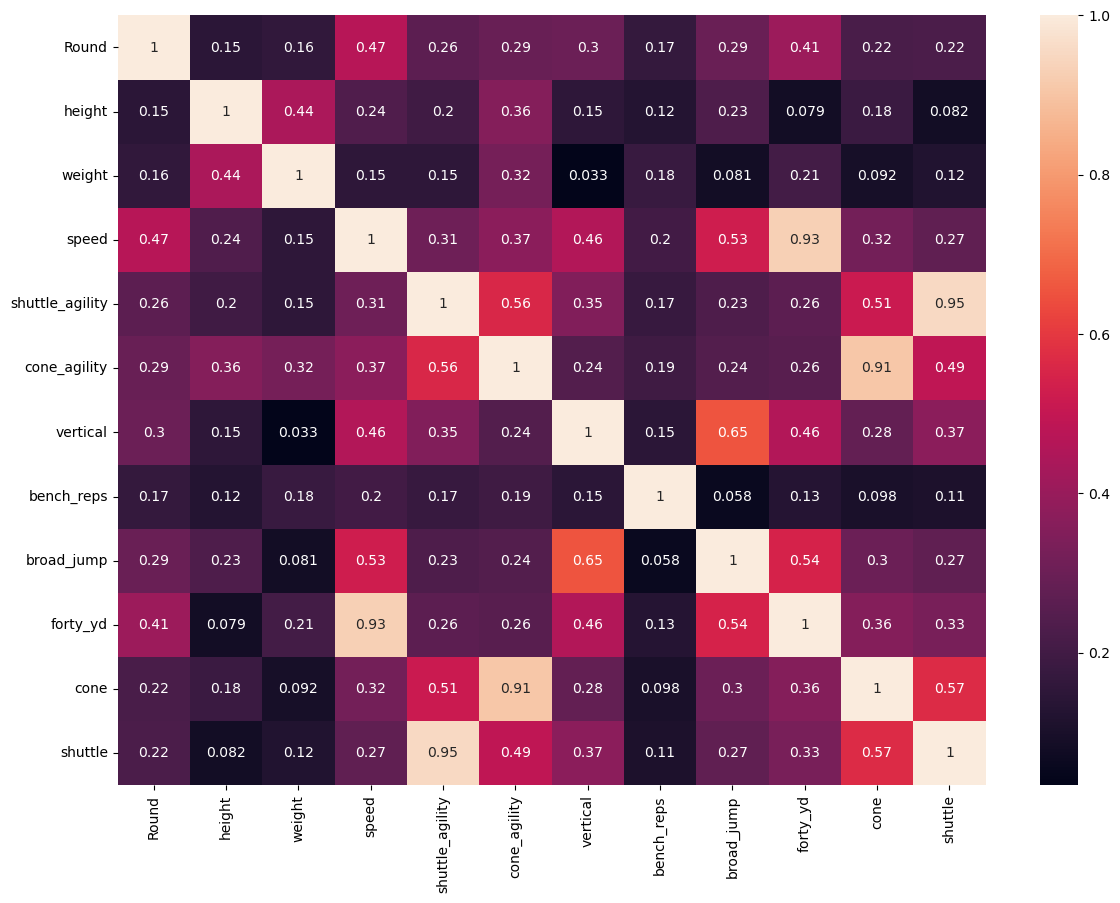

In [73]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'LB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\3658448629.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'CB'].corr().abs(),annot=True);


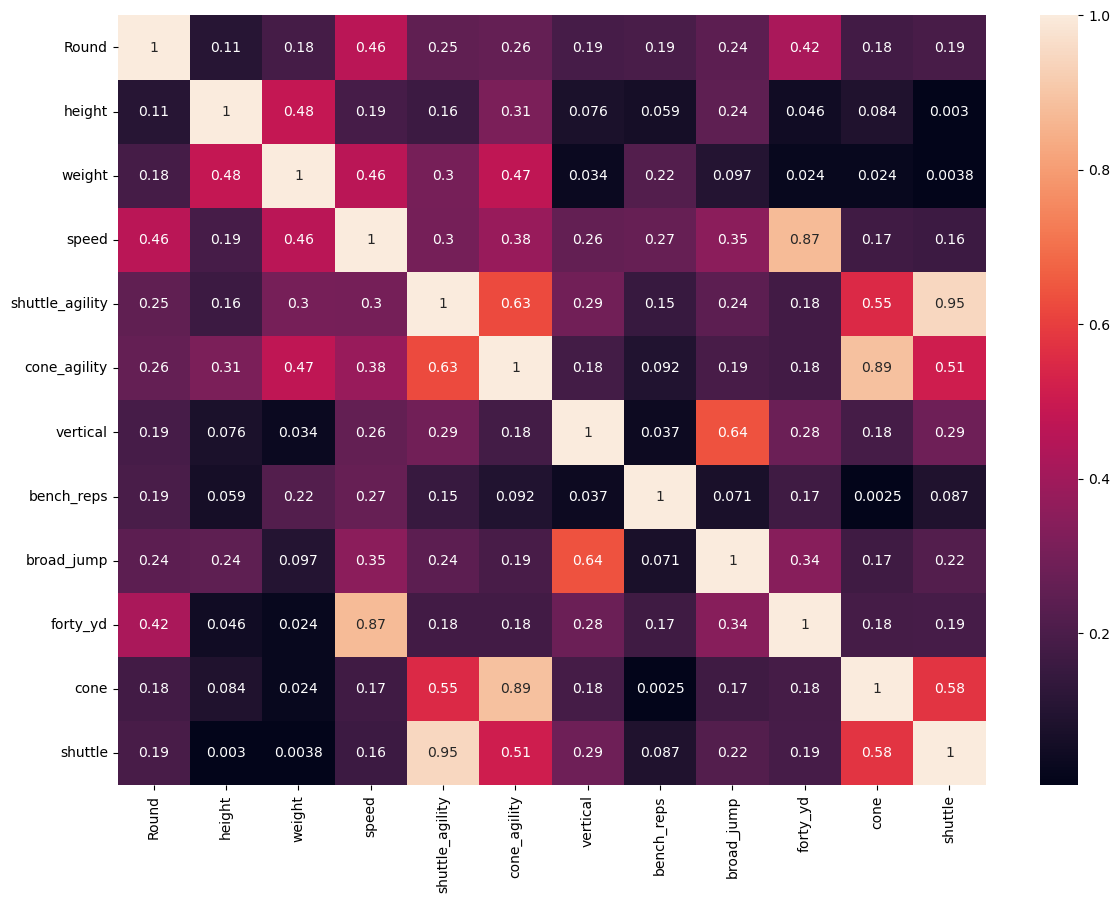

In [74]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'CB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\106728163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DB'].corr().abs(),annot=True);


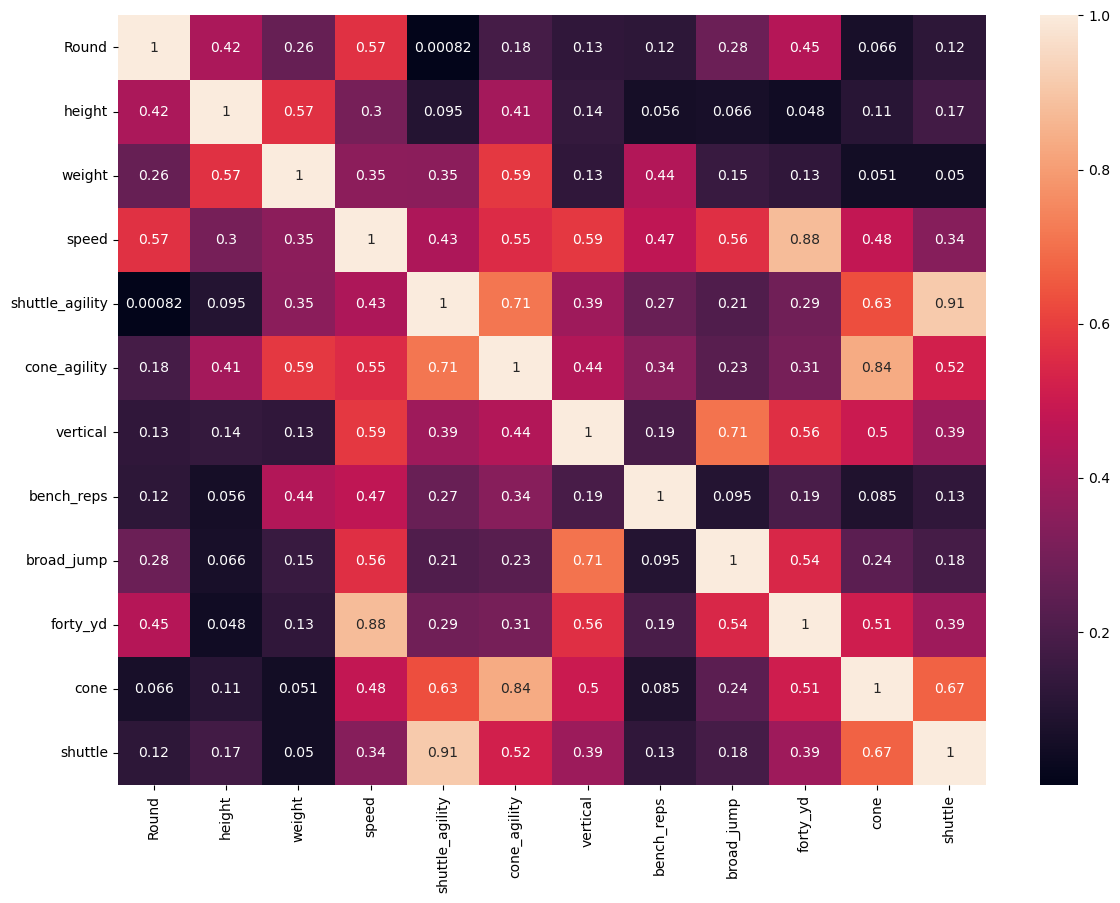

In [75]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_25540\159827862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'S'].corr().abs(),annot=True);


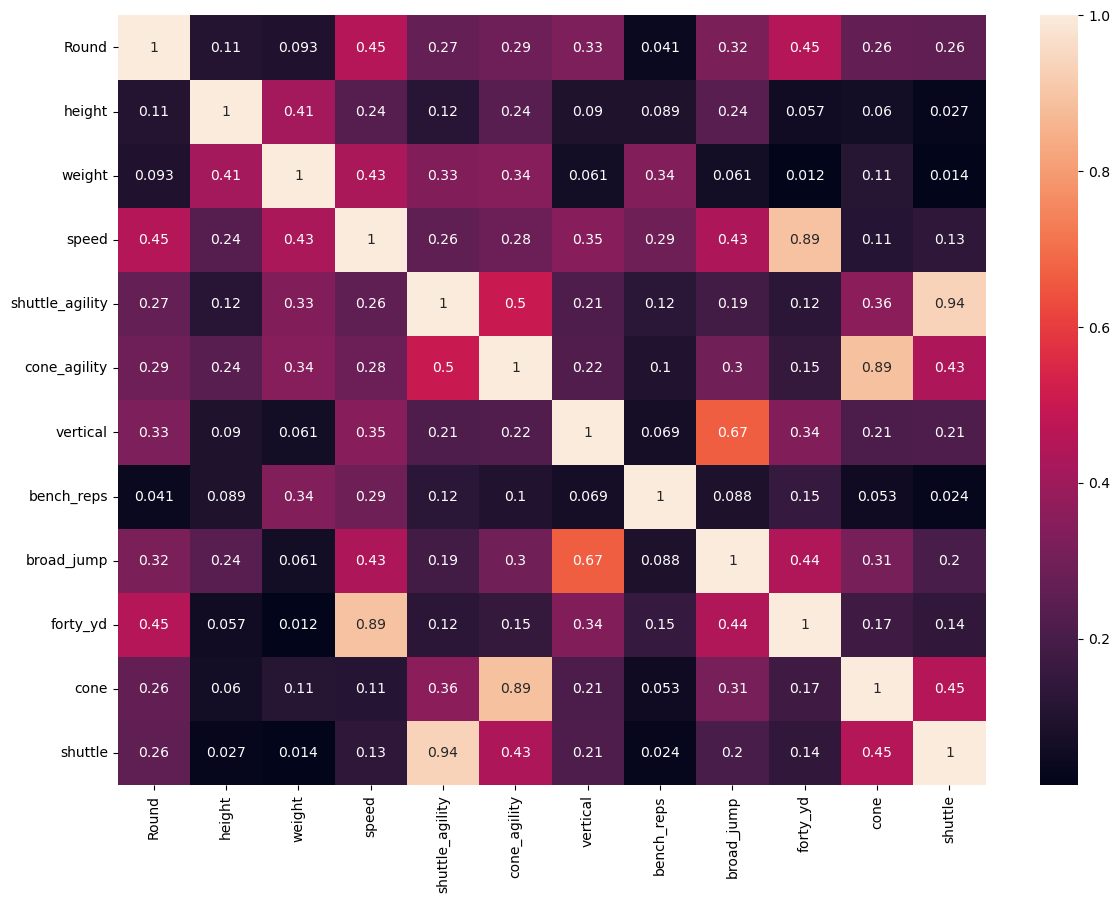

In [76]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'S'].corr().abs(),annot=True);

In [77]:
combine.college_conference.value_counts()

Southeastern Conference                             583
Big Ten Conference                                  398
Atlantic Coast Conference                           380
Pacific Twelve Conference                           345
Big Twelve Conference                               234
American Athletic Conference                        105
Mountain West Conference                             93
Conference USA                                       79
Independent                                          69
Mid-American Conference                              52
Big East                                             44
Sun Belt Conference                                  31
Missouri Valley Football Conference                  23
Colonial Athletic Association                        20
Southern Conference                                  15
Western Athletic Conference                          14
Big Sky Conference                                   14
Mid-Eastern Athletic Conference                 